In [4]:
import numpy as np
from scipy.integrate import odeint
import h5py
from tqdm import tqdm

def U(v):
    Ax = 1.05
    Ay = 1.1
    Az = 1.15
    x, y, z = v
    return (x - Ax)**2 * (x + Ax)**2 + (y - Ay)**2 * (y + Ay)**2 + (z - Az)**2 * (z + Az)**2

def force(v, t):
    x, y, z = v
    dxdt = 2*(-1.05+x)**2*(1.05+x)+2*(-1.05+x)*(1.05+x)**2
    dydt = 2*(-1.1+y)**2*(1.1+y)+2*(-1.1+y)*(1.1+y)**2
    dzdt = 2*(-1.15+z)**2*(1.15+z)+2*(-1.15+z)*(1.15+z)**2
    return [-dxdt,-dydt,-dzdt]

def potential_data(timesteps, dt, res, eps):
    x_f = np.zeros((3, timesteps))
    xOld = np.zeros(3)
    der = np.zeros((3, timesteps))
    
    for i in tqdm(range(1, timesteps)):
        xOld = x_f[:, i-1]
        sol = odeint(force, xOld, np.array([0, dt]))
        noise = np.random.randn(3)
        x_f[:, i] = sol[-1,:] + eps * np.sqrt(dt) * noise
        der[:, i-1] = x_f[:, i] - xOld
        
    xOld = x_f[:, -1]
    sol = odeint(force, xOld, np.array([0, dt]))
    der[:, -1] = sol[-1,:] - xOld + eps * np.sqrt(dt) * np.random.randn(3)

    L2 = timesteps // res
    Dt = dt * res
    x = np.zeros((3, L2))
    
    for i in range(L2):
        x[:, i] = x_f[:, res*i]

    return x, Dt, der

timesteps = int(1e6)
dt = 0.03
res = 1
eps = 0.75

x, dt, der = potential_data(timesteps, dt, res, eps)

np.save('naturerun_PWell.npy', x)
np.save('derivative_PWell.npy', der)

100%|████████████████████████████████| 999999/999999 [01:05<00:00, 15183.36it/s]


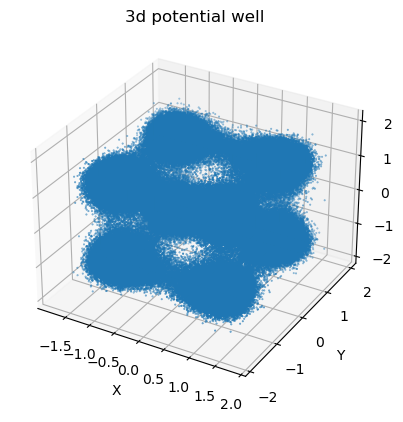

In [5]:
import matplotlib.pyplot as plt

# Set up the loop and plot
fig =  plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0,:], x[1,:], x[2,:], s=.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3d potential well')
plt.savefig('../../fig/3dPotentialWell.png')
plt.show()